In [59]:

!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=6ef2d77a6efc05f8d0b1793e4ded17f4fbc7cb3515db7ad9462083be607bd925
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial import distance_matrix
from scipy.special import comb
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score
# Import Fuzzy C-means (FCM)
from skfuzzy.cluster import cmeans ,cmeans_predict
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.spatial import distance_matrix
from itertools import combinations
from scipy.spatial.distance import cdist


In [18]:
df=pd.read_csv("/content/seeds.csv")
df.shape

(199, 8)

In [17]:
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# **Detecting** **Nulls**

In [12]:
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

NO Null data


# **Correlation Heatmap**

                     Area  Perimeter  Compactness  Kernel.Length  \
Area             1.000000   0.994437     0.609887       0.951126   
Perimeter        0.994437   1.000000     0.531841       0.972944   
Compactness      0.609887   0.531841     1.000000       0.374011   
Kernel.Length    0.951126   0.972944     0.374011       1.000000   
Kernel.Width     0.970980   0.945496     0.762167       0.862680   
Asymmetry.Coeff -0.222820  -0.211034    -0.329400      -0.169704   
Kernel.Groove    0.862727   0.889543     0.227016       0.932124   
Type            -0.340664  -0.322223    -0.539261      -0.249422   

                 Kernel.Width  Asymmetry.Coeff  Kernel.Groove      Type  
Area                 0.970980        -0.222820       0.862727 -0.340664  
Perimeter            0.945496        -0.211034       0.889543 -0.322223  
Compactness          0.762167        -0.329400       0.227016 -0.539261  
Kernel.Length        0.862680        -0.169704       0.932124 -0.249422  
Kernel.Width     

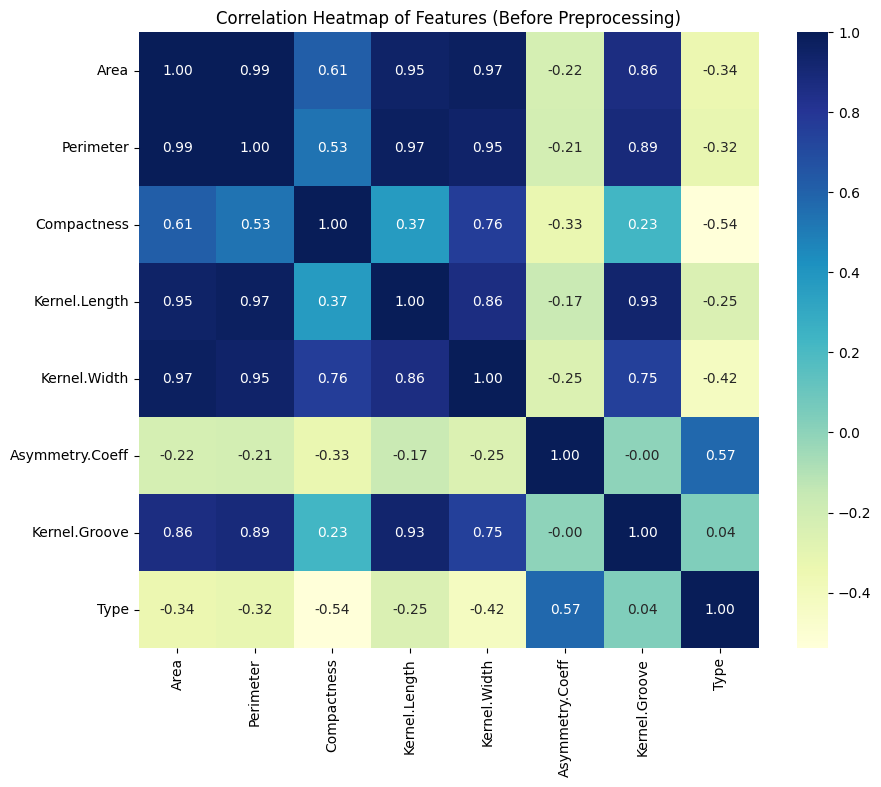

In [24]:
# Visualize correlation heatmap before preprocessing
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
print(df.corr())
plt.title('Correlation Heatmap of Features (Before Preprocessing)')
plt.show()

# **patterns and correlations in the data**

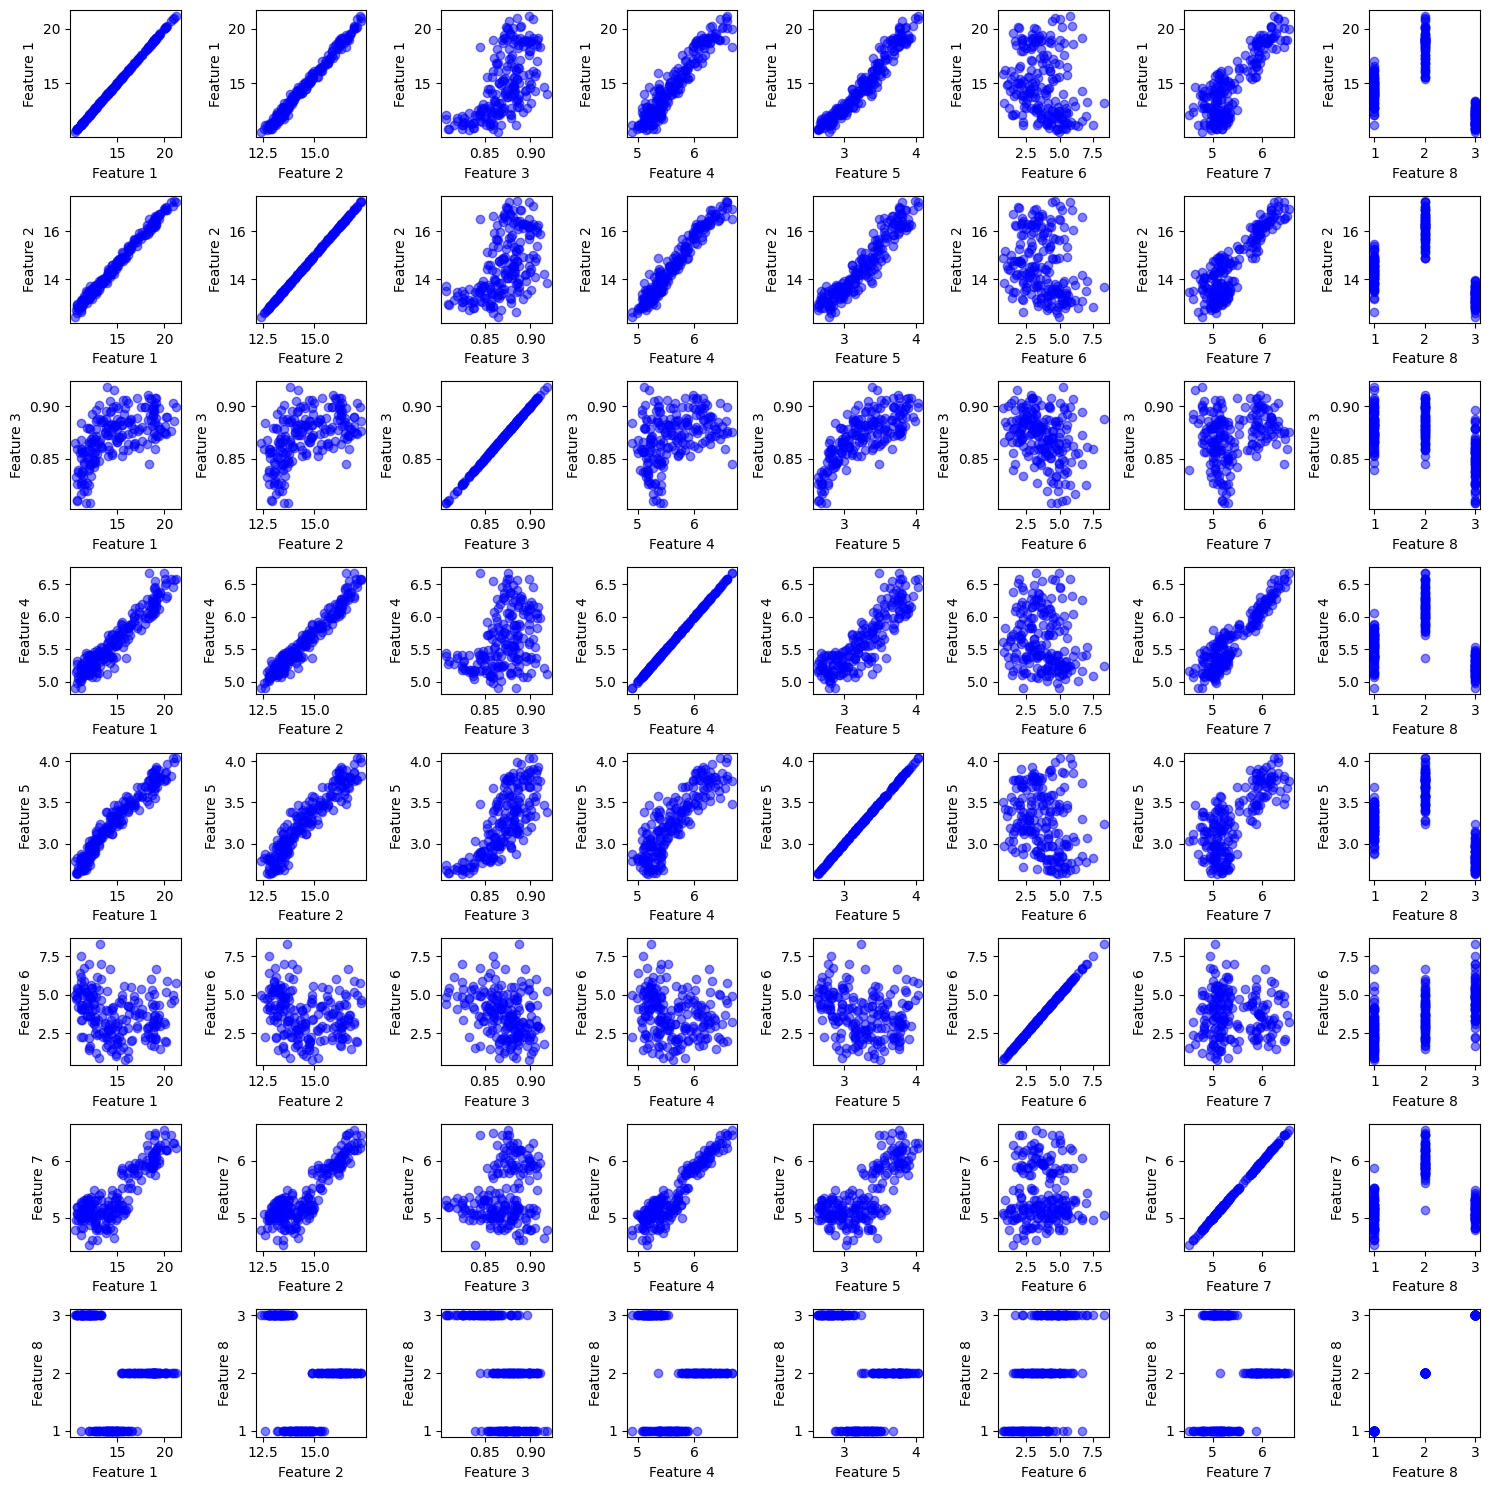

In [28]:
num_features = df.shape[1]
fig, axes = plt.subplots(nrows=num_features, ncols=num_features, figsize=(15, 15))

for i in range(num_features):
    for j in range(num_features):
        axes[i, j].scatter(df.iloc[:, j], df.iloc[:, i], color='b', alpha=0.5)
        axes[i, j].set_xlabel('Feature {}'.format(j+1))
        axes[i, j].set_ylabel('Feature {}'.format(i+1))
plt.tight_layout()
plt.show()

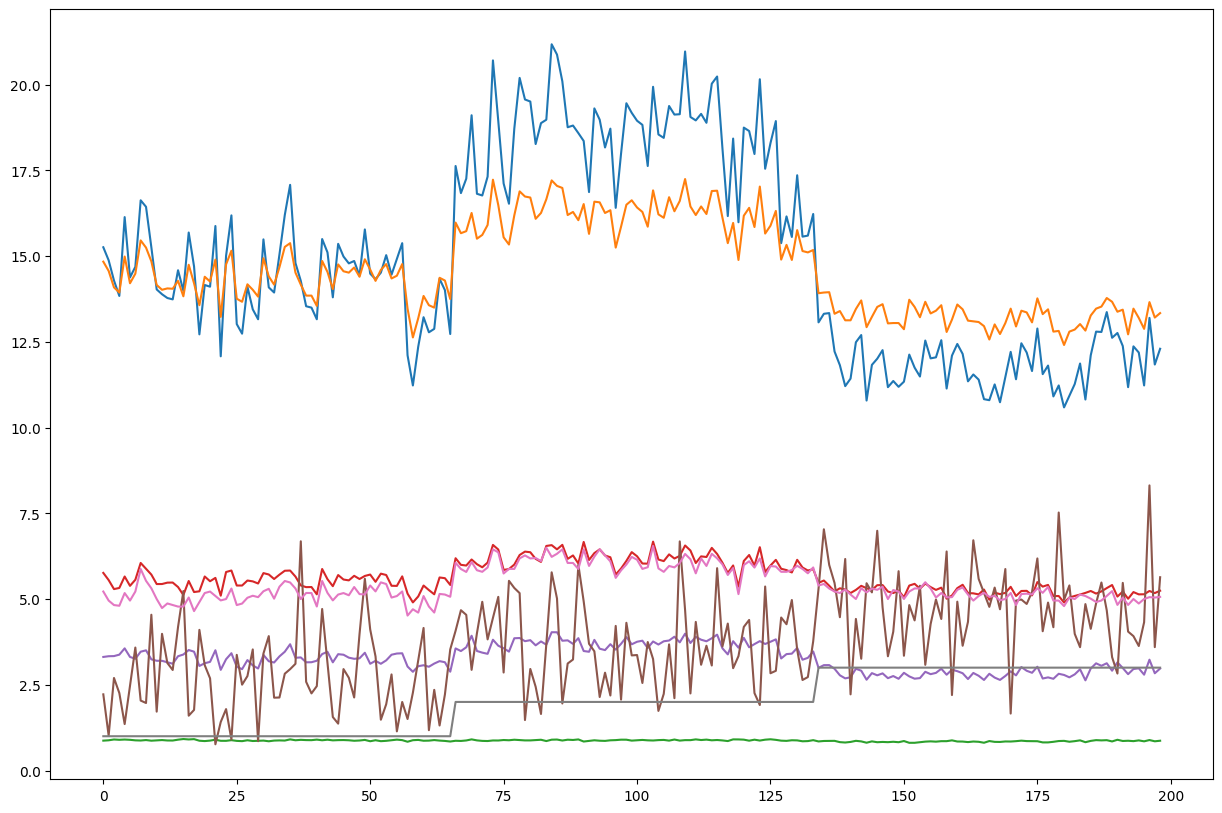

In [30]:
plt.figure(figsize=(15,10))
plt.plot(df)
plt.show()

# **Detecting Outliers**

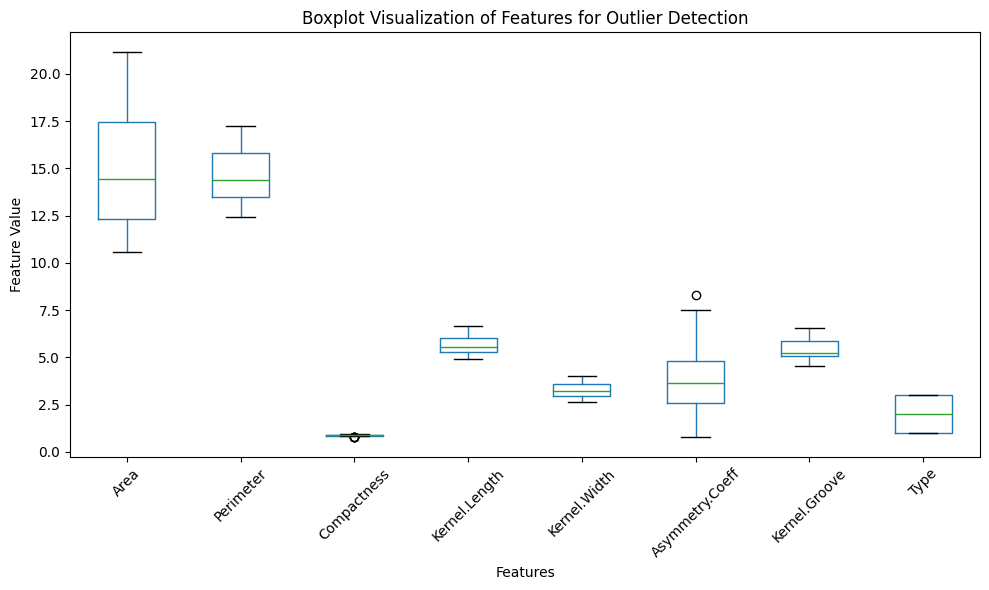

In [29]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot Visualization of Features for Outlier Detection')
plt.ylabel('Feature Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

# **Dropping Target**

In [31]:
x=df.drop(columns=['Type'])

# **PCA**

In [77]:
y=df.values
pca = PCA()

# Fit PCA to the scaled data
pca.fit(y)


PCA()

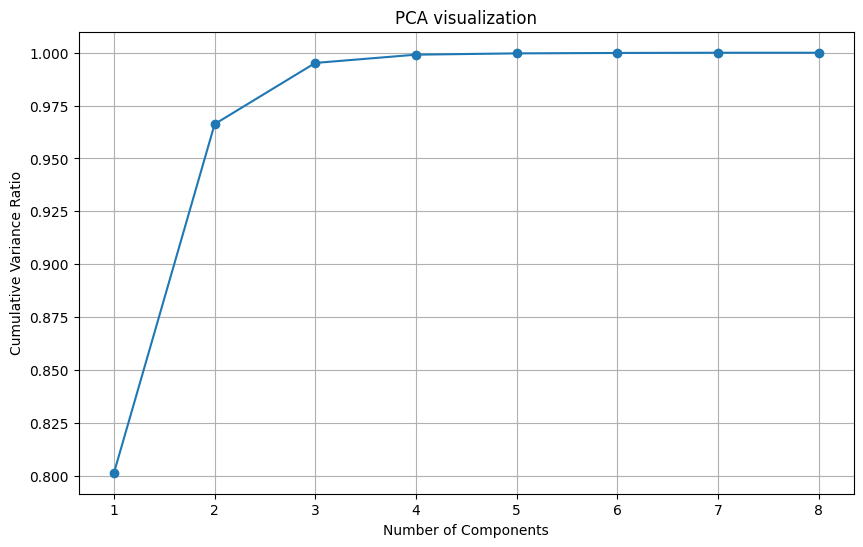

In [78]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('PCA visualization')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.grid(True)
plt.show()

In [79]:

# Apply PCA with different numbers of components
pca_list = []
errors = []
for n_components in range(1, 8):
    pca = PCA(n_components=n_components)
    pca.fit(y)
    pca_list.append(pca)

# Compress and decompress the data with different numbers of components
for i, pca in enumerate(pca_list):
    compressed_data = pca.transform(y)
    decompressed_data = pca.inverse_transform(compressed_data)

    # Calculate the reconstruction error
    error = np.mean(np.square(y - decompressed_data))
    errors.append(error)


    print(f"Number of components: {i+1}")
    print(f"Reconstruction error: {error}")


optimal_components = np.argmin(errors) + 1


pca = PCA(n_components=optimal_components)
pca.fit(y)


transformed_data = pca.transform(y)

Number of components: 1
Reconstruction error: 0.3371902776708093
Number of components: 2
Reconstruction error: 0.05730003703443767
Number of components: 3
Reconstruction error: 0.008194740485392454
Number of components: 4
Reconstruction error: 0.0015706441163685358
Number of components: 5
Reconstruction error: 0.0005208772523574893
Number of components: 6
Reconstruction error: 0.00018745490107951283
Number of components: 7
Reconstruction error: 3.0545228283404225e-06


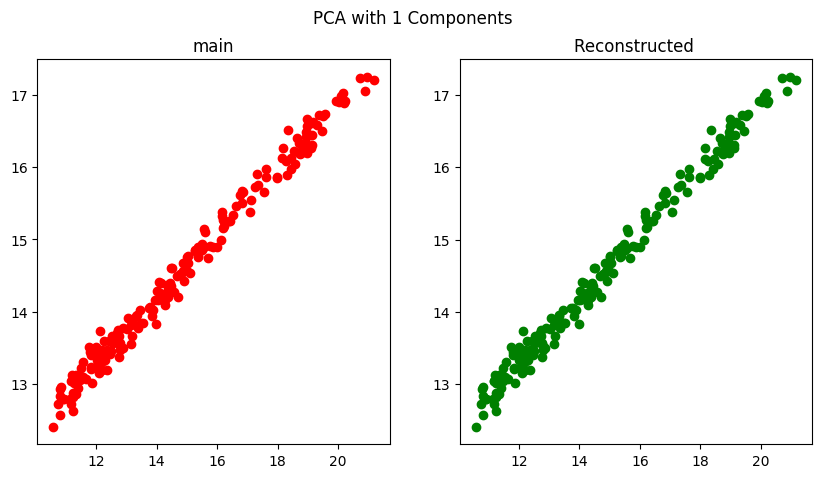

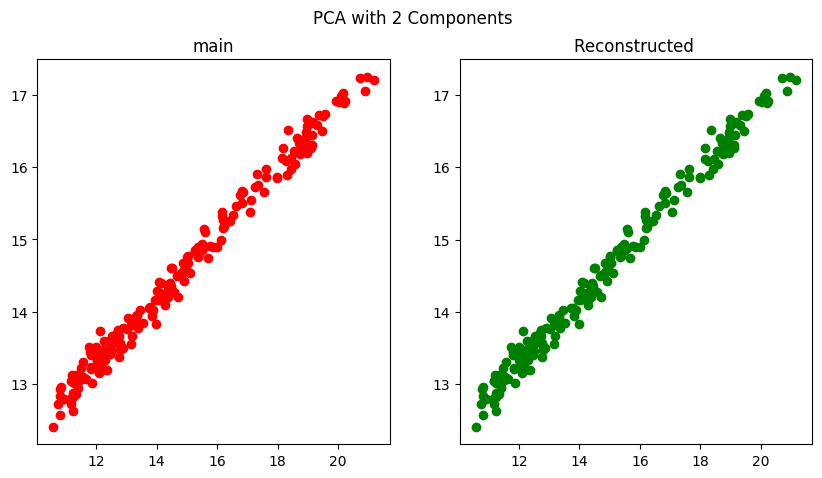

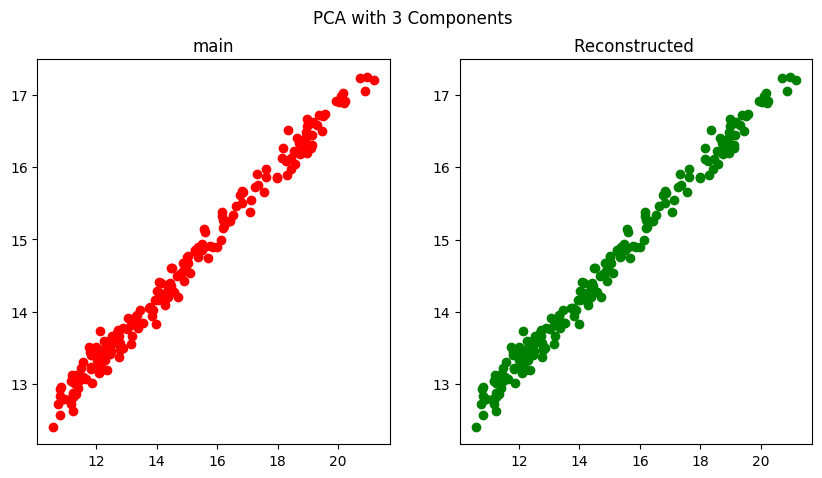

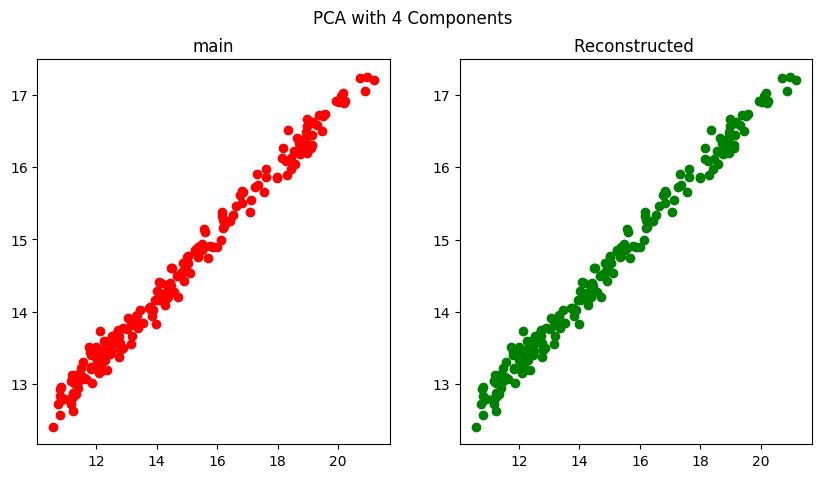

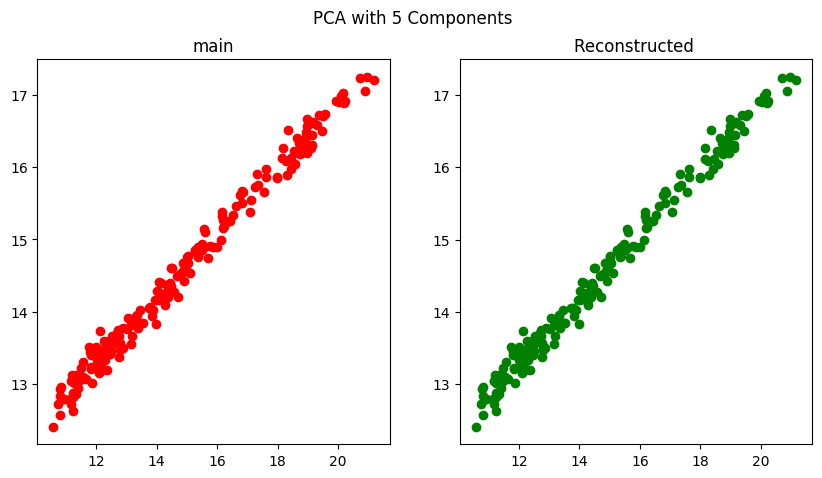

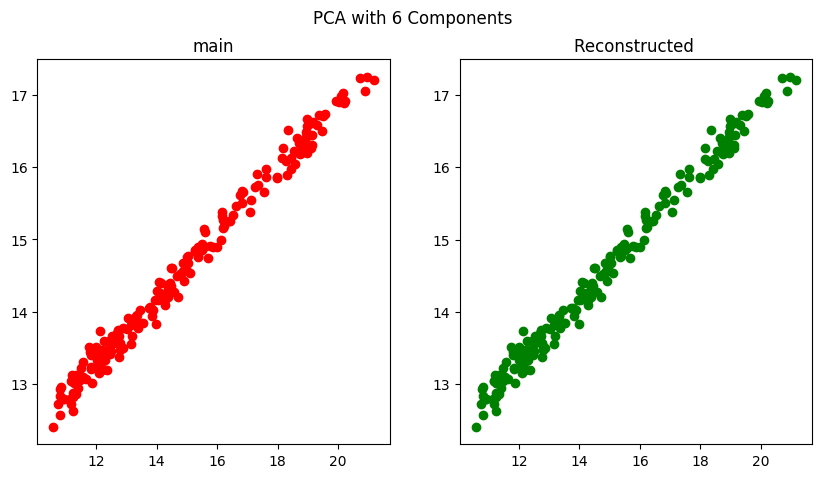

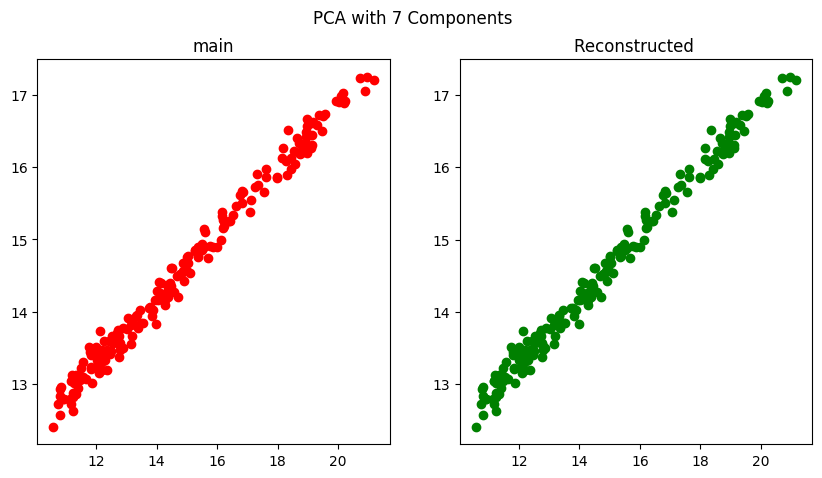

In [80]:
for n_components in range(1, 8):
   figure, axis = plt.subplots(1, 2, figsize=(10, 5))
   axis[0].scatter(y[:, 0], y[:, 1], c='r', label='main Data')
   axis[0].set_title('main')
   axis[1].scatter(decompressed_data[:, 0], decompressed_data[:, 1], c='g', label='Reconstructed Data')
   axis[1].set_title('Reconstructed ')
   plt.suptitle(f'PCA with {n_components} Components')
   plt.show()

### optimal components is 5

In [81]:
pca = PCA(n_components=5)
pca.fit(y)
df_compressed = pca.transform(y)


In [87]:


# Set the number of clusters
n_clusters = 3

# Set the fuzziness coefficient (m)
m = 2

# Perform fuzzy c-means clustering
cntr, u,_,_,_,_,_ = fuzz.cluster.cmeans(y.T, n_clusters, m, error=0.005, maxiter=1000)
silhouette_fcm = silhouette_score(y, np.argmax(u ,axis=0))
print(f"FCM m={m}: Silhouette Score = {silhouette_fcm:.4f}")


FCM (m=2): Silhouette Score = 0.4957


In [101]:

# Set the number of clusters
n_clusters = 3

# Set the fuzziness coefficient (m)
m = 2

# Perform fuzzy c-means clustering
cntr, u,_,_,_,_,_ = fuzz.cluster.cmeans(df_compressed.T, n_clusters, m, error=0.005, maxiter=1000)
silhouette_fcm = silhouette_score(df_compressed, np.argmax(u ,axis=0))
print(f"FCM m={m}: Silhouette Score = {silhouette_fcm:.4f}")


FCM (m=2): Silhouette Score = 0.4961


In [99]:
x2 = x.drop(['Perimeter', 'Kernel.Length', 'Kernel.Width'], axis=1)

In [133]:
# Set the number of clusters
n_clusters = 3

# Set the fuzziness coefficient (m)
m = 2

# Perform fuzzy c-means clustering
cntr, u,_,_,_,_,_ = fuzz.cluster.cmeans(x2.T, n_clusters, m, error=0.005, maxiter=1000)
silhouette_fcm = silhouette_score(x2, np.argmax(u ,axis=0))
print(f"FCM m={m}: Silhouette Score = {silhouette_fcm:.4f}")

FCM m=2: Silhouette Score = 0.4689


# **Conclusion The data with PCA has the best accuracy (Second one)**

In [131]:
n_clusters = 3
m = 2

cntr, u, _, _, _, _, _ = cmeans(data=x2.T, c=n_clusters, m=m, error=1e-5, maxiter=1000)
entropy = -np.sum(u * np.log(u))
silhouette_fcm = silhouette_score(x2, np.argmax(u, axis=0))
print(f"FCM with Entropy  m={m}: Silhouette Score = {silhouette_fcm:.4f}, Entropy = {entropy:.4f}")


FCM with Entropy  m=2: Silhouette Score = 0.4689, Entropy = 100.8508


In [132]:

n_clusters = 3
m = 2
entropy = -np.sum(u * np.log(u))
cntr, u,_,_,_,_,_ = fuzz.cluster.cmeans(data=y.T,c= n_clusters, m=m, error=1e-5, maxiter=1000)
silhouette_fcm = silhouette_score(y, np.argmax(u ,axis=0))
print(f"FCM m={m}: Silhouette Score = {silhouette_fcm:.4f} ,Entropy = {entropy:.4f}")

FCM m=2: Silhouette Score = 0.4957 ,Entropy = 100.8508


In [129]:

n_clusters = 3
m = 2
entropy = -np.sum(u * np.log(u))
cntr, u,_,_,_,_,_ = fuzz.cluster.cmeans(data=df_compressed.T,c= n_clusters, m=m, error=1e-5, maxiter=1000)
silhouette_fcm = silhouette_score(df_compressed, np.argmax(u ,axis=0))
print(f"FCM m={m}: Silhouette Score = {silhouette_fcm:.4f} ,Entropy = {entropy:.4f}")

FCM m=2: Silhouette Score = 0.4961 ,Entropy = 95.8406
